In [1]:
import torch
import requests
import matplotlib.pyplot as plt

In [7]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)

v = []
ans = []

with open('iris.data', 'r') as f:
  for line in f:
    line = line.strip()

    if len(line) != 0:
      items = line.split(",")
      v.append([float(x) for x in items[:4]])
      ans.append(items[4])

species = {a: i for i, a in enumerate(set(ans))}

species

{'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2}

In [8]:
X = torch.FloatTensor(v)
Z = (X-torch.mean(X, axis=0))

print(X)
print(Z)

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [18]:
def findPC(Z):

  w = torch.randn(Z.shape[1])
  w = w / (torch.dot(w,w)**0.5)

  lr = 0.1
  for epoch in range(1001):

    w.requires_grad_(True)
    variance = torch.mean(torch.sum(Z * w, dim = 1) ** 2)

    variance.backward()

    with torch.no_grad():
      w = w + lr * w.grad
      w = w/(torch.dot(w, w)**0.5)

    return w, variance.item()

def PCA(Z, n):
  W, V = [], []

  for _ in range(n):
    w, v = findPC(Z)
    W.append(w)
    V.append(v)
    Z = Z - (Z @ w.view(-1, 1)) * w

  return W, V

def transform(Z, W):
  return Z @ torch.stack(W).T

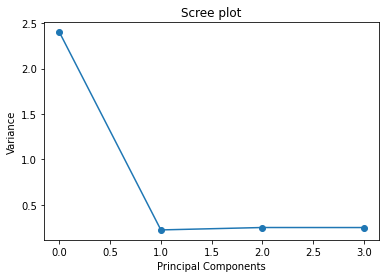

In [32]:
W, V = PCA(Z, 4)
K = transform(Z, W)

plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

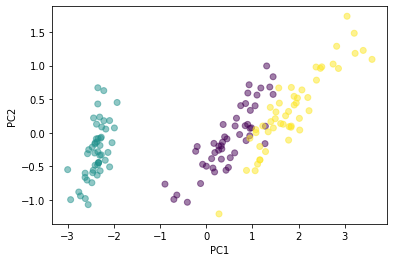

In [33]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c = [species[a] for a in ans], alpha=0.5)
plt.show()